#### 결측값 처리 실습

In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
import missingno as msno
import seaborn as sns

titanic = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

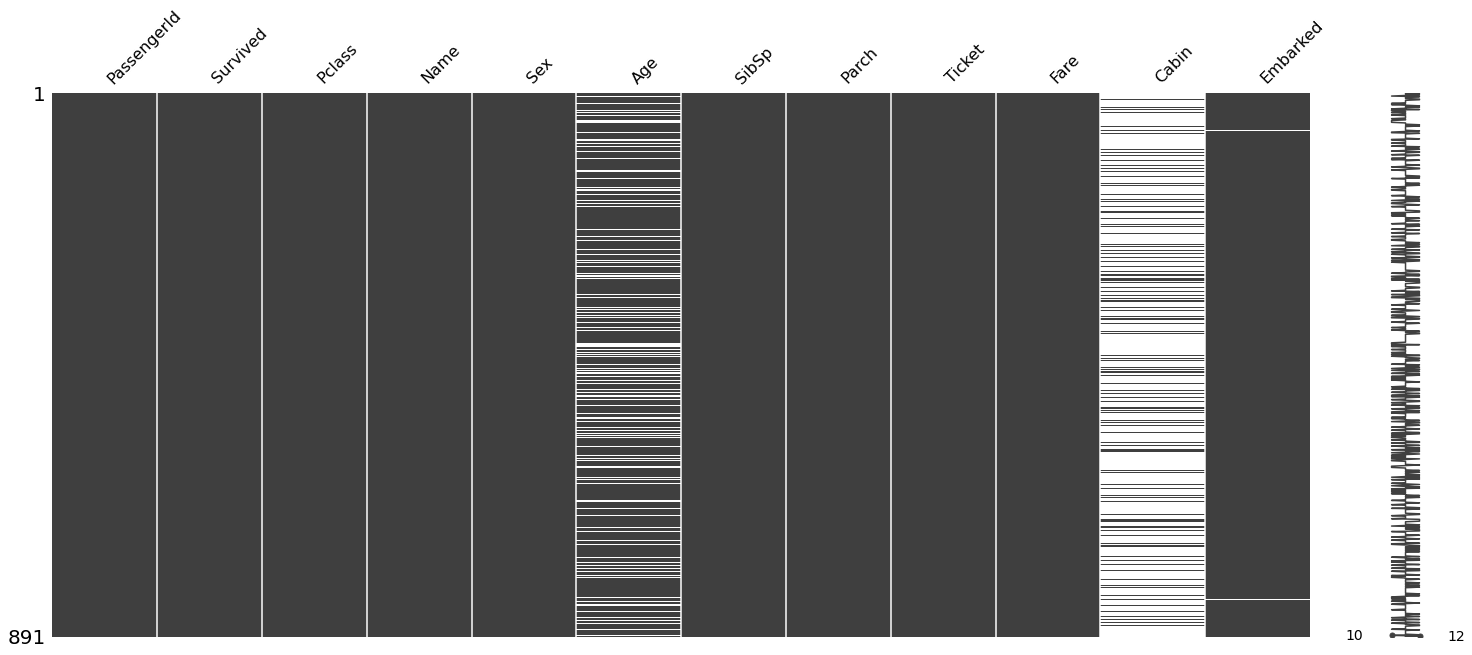

In [5]:
msno.matrix(titanic)

<AxesSubplot:>

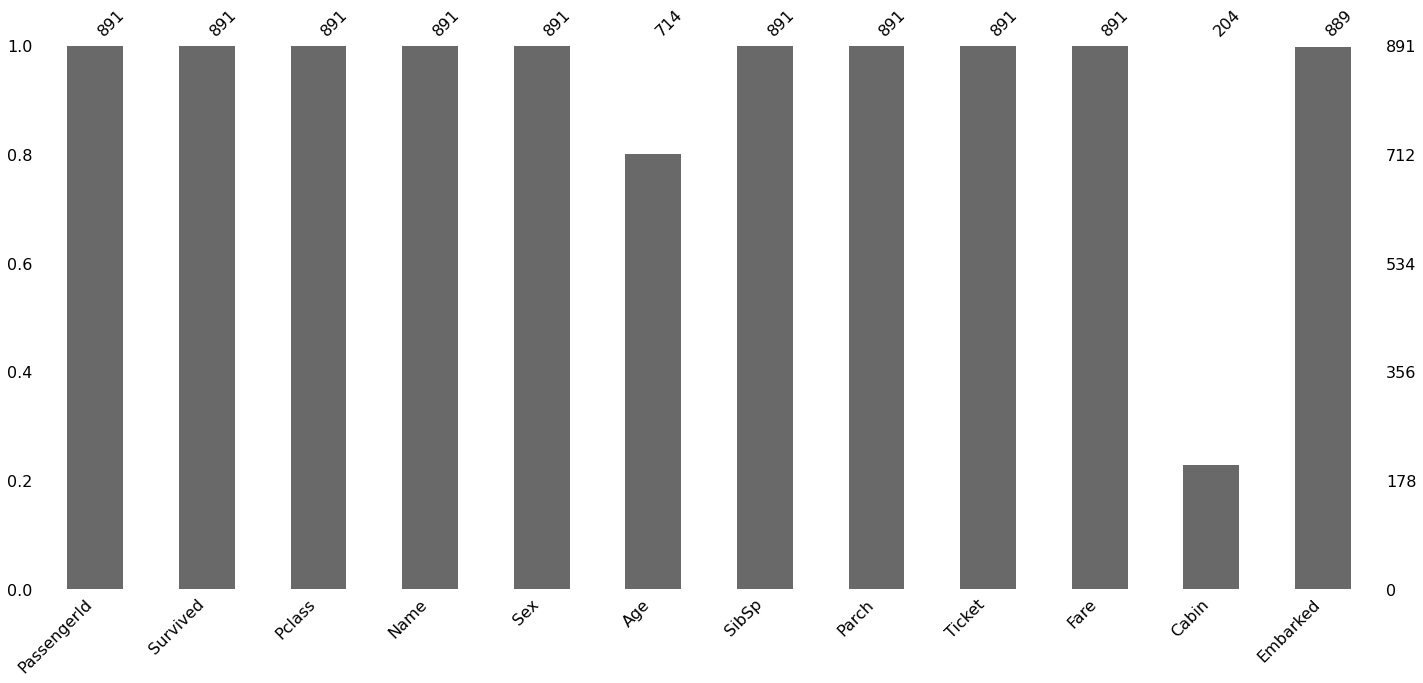

In [6]:
msno.bar(titanic)

<AxesSubplot:xlabel='Age', ylabel='Density'>

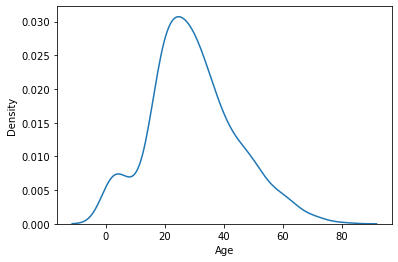

In [9]:
sns.kdeplot(titanic.Age)

결측치 50%이상인 경우 삭제 -> cabin   
카테고리값은 최빈값 -> embarked   
비정규분포값은 중위수 -> age


In [13]:
#결측치 50%이상 삭제
titanic = titanic.drop(columns=['Cabin'],axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

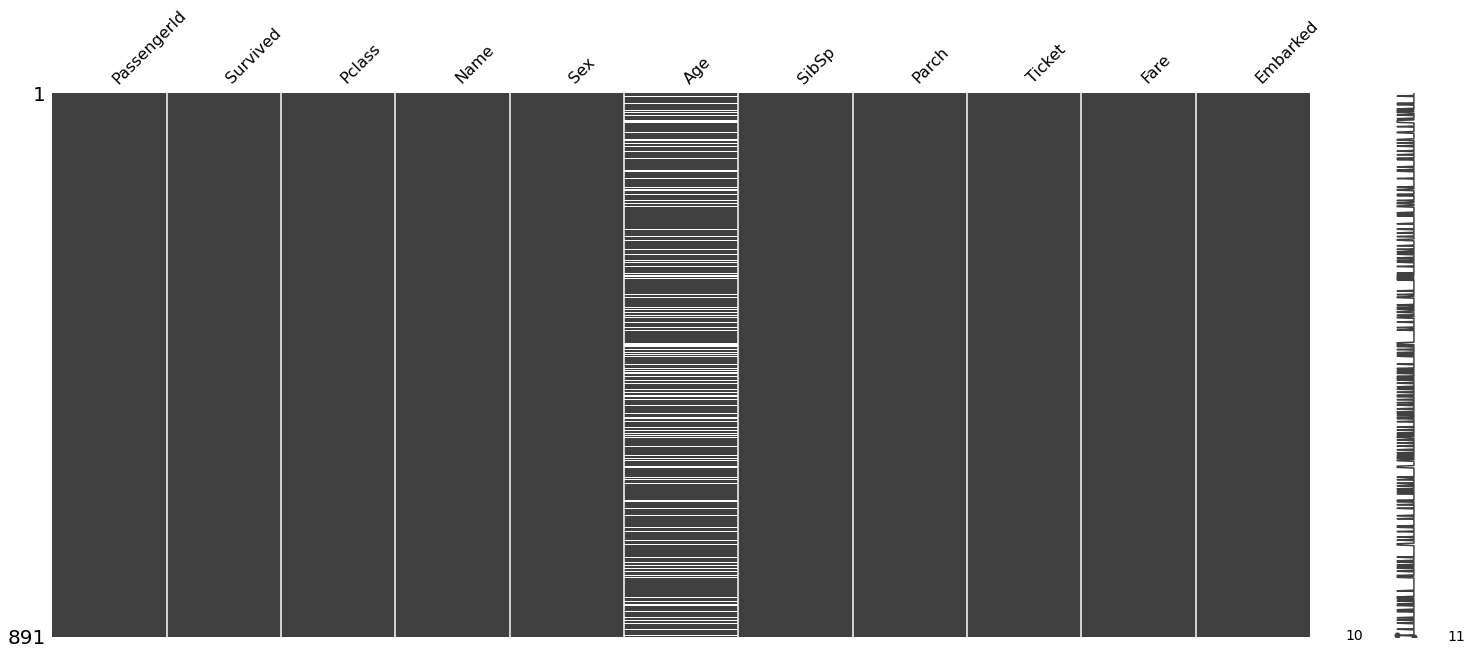

In [20]:
#카테고리값 최빈값
imputer_embarked = SimpleImputer(strategy='most_frequent')
titanic['Embarked'] = imputer_embarked.fit_transform(titanic[['Embarked']])
titanic['Embarked'].isnull().sum()

msno.matrix(titanic)

<AxesSubplot:>

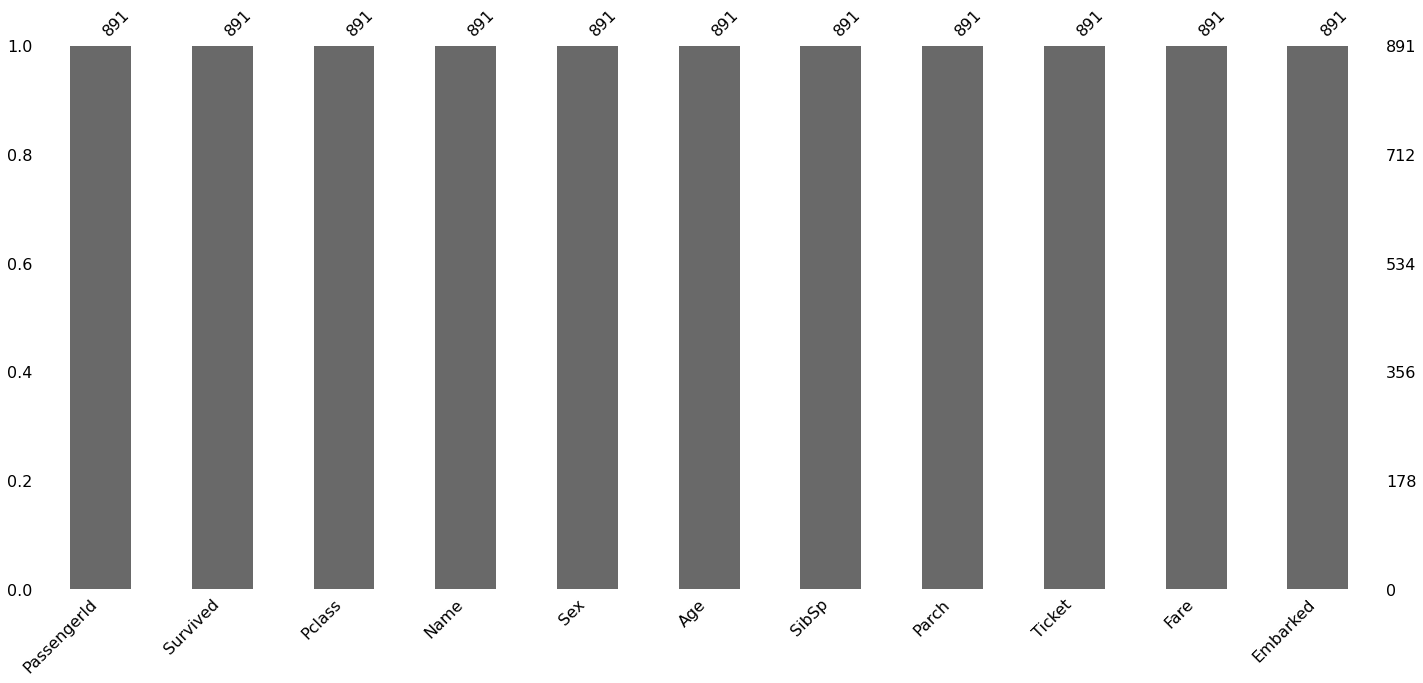

In [21]:
#비정규분포값 중위값
imputer_age = SimpleImputer(strategy='median')
titanic['Age'] = imputer_age.fit_transform(titanic[['Age']])
msno.bar(titanic)